<a href="https://colab.research.google.com/github/rdwn354/tensorflow-1-public/blob/main/Image_Data_Generator_with_Validation_and_compact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-11-27 21:06:58--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.207, 108.177.13.207, 172.217.204.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   138MB/s    in 1.0s    

2023-11-27 21:06:59 (138 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-11-27 21:06:59--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.207, 108.177.13.207, 172.217.204.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2023-11-27 21:06:59 (96.3 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
import zipfile
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

In [ ]:
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('validation-horse-or-human')

In [ ]:
import os

#dir horse or human
train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')

#dir validation
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')
validation_human_dir =  os.path.join('./validation-horse-or-human/humans')

In [ ]:
train_horse_name = os.listdir(train_horse_dir)
print(f"Train horse name = {train_horse_name[:10]}")

train_human_name = os.listdir(train_human_dir)
print(f"Train human name = {train_human_name[:10]}")

validation_horse_name = os.listdir(validation_horse_dir)
print(f"Validation horse name = {validation_horse_name[:10]}")

validation_human_name = os.listdir(validation_human_dir)
print(f"Validation human name = {validation_human_name[:10]}")

Train horse name = ['horse11-1.png', 'horse38-2.png', 'horse30-1.png', 'horse43-7.png', 'horse35-1.png', 'horse42-5.png', 'horse23-2.png', 'horse12-3.png', 'horse48-4.png', 'horse09-1.png']
Train human name = ['human13-11.png', 'human17-21.png', 'human05-08.png', 'human03-13.png', 'human03-23.png', 'human10-00.png', 'human01-15.png', 'human11-13.png', 'human06-24.png', 'human02-22.png']
Validation horse name = ['horse5-002.png', 'horse3-521.png', 'horse4-503.png', 'horse5-275.png', 'horse3-171.png', 'horse2-412.png', 'horse6-153.png', 'horse4-389.png', 'horse4-541.png', 'horse2-368.png']
Validation human name = ['valhuman03-17.png', 'valhuman01-23.png', 'valhuman01-08.png', 'valhuman05-04.png', 'valhuman04-17.png', 'valhuman05-27.png', 'valhuman03-01.png', 'valhuman05-20.png', 'valhuman01-14.png', 'valhuman03-19.png']


In [ ]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

['./horse-or-human/horses/horse11-1.png', './horse-or-human/horses/horse38-2.png', './horse-or-human/horses/horse30-1.png', './horse-or-human/horses/horse43-7.png', './horse-or-human/horses/horse35-1.png', './horse-or-human/horses/horse42-5.png', './horse-or-human/horses/horse23-2.png', './horse-or-human/horses/horse12-3.png']


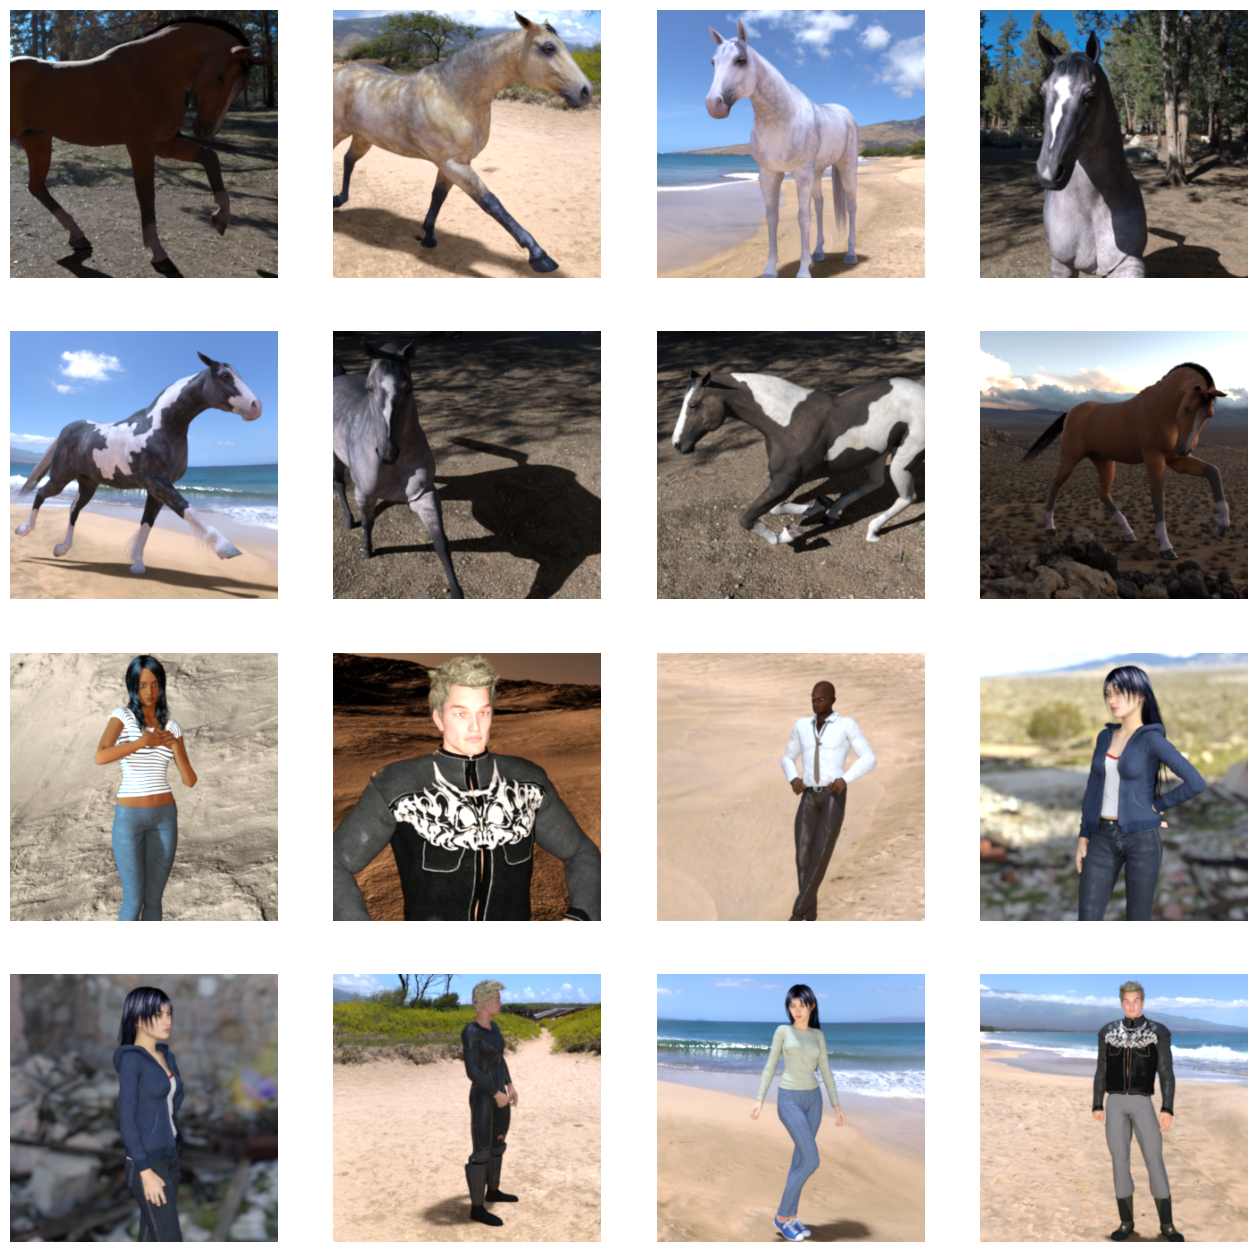

In [ ]:
#setup matplotlib

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index = 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_name[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_name[pic_index-8:pic_index]]
print(next_horse_pix)

for i, img_path in enumerate (next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # # The fourth convolution
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # # The fifth convolution
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 64)       

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy']
              )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    './horse-or-human',
    target_size = (150,150),
    batch_size = 128,
    class_mode = 'binary'
)

validation_generator = train_datagen.flow_from_directory(
    './validation-horse-or-human',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'

)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


#Train

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 30s 4s/step - loss: 1.7447 - accuracy: 0.5495 - val_loss: 0.6431 - val_accuracy: 0.8203
Epoch 2/15
8/8 [==============================] - 29s 3s/step - loss: 0.5820 - accuracy: 0.7253 - val_loss: 0.6480 - val_accuracy: 0.5273
Epoch 3/15
8/8 [==============================] - 31s 4s/step - loss: 0.4961 - accuracy: 0.7964 - val_loss: 0.4782 - val_accuracy: 0.7695
Epoch 4/15
8/8 [==============================] - 30s 4s/step - loss: 0.3771 - accuracy: 0.8598 - val_loss: 0.5856 - val_accuracy: 0.7188
Epoch 5/15
8/8 [==============================] - 28s 3s/step - loss: 0.2093 - accuracy: 0.9166 - val_loss: 0.7911 - val_accuracy: 0.8164
Epoch 6/15
8/8 [==============================] - 28s 3s/step - loss: 1.2047 - accuracy: 0.8832 - val_loss: 0.7831 - val_accuracy: 0.6562
Epoch 7/15
8/8 [==============================] - 29s 3s/step - loss: 0.1934 - accuracy: 0.9488 - val_loss: 0.2903 - val_accuracy: 0.9023
Epoch 8/15
8/8 [==================

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes.shape)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")